# Your info

Full name: M.Amin Ghasvari

Student ID: 97521432

# Q1. Perceptron

In [13]:
# Q1_graded

import numpy as np
import matplotlib.pyplot as plt
import random

In [14]:
# Q1_graded

# Perceptron
class Perceptron:

  def __init__(self):
    # weights include all of the weights for this perceptron, 
    # and the first element is bias.
    self.weights = []
    self.bias = 0


  def fit(self, x, y, learning_rate=0.01, num_iter=100):

    (n_feature, n_inputs) = x.shape

    # Randomly initialize the weights
    self.weights = np.random.rand(n_feature)

    # Main perceptron iteration
    for i in range(num_iter):
      
      predict = np.dot(self.weights, x) + self.bias

      # Caculate the error
      diff = y- predict
      errors = (1 / n_inputs) * np.sum((1/2) * (diff)**2)

      # Update the weights (Avg of the changes)
      weights_diff = np.sum((diff) * x, axis = 1)
      self.weights += (1 / n_inputs) * learning_rate *  weights_diff
      self.bias += (1 / n_inputs) * learning_rate *  np.sum(diff)

      if i % 100 == 0:
        print("Iteration number {}\tBias: {}\tweights: {}     error: {}".
              format(i, self.bias, self.weights, errors/n_inputs))


In [15]:
# Q1_graded

nor_data = np.array([
    [-1, 1, -1, 1],
    [-1, -1, 1, 1]
])

nor_result = np.array([1, -1, -1, -1])


p = Perceptron()
p.fit(nor_data, nor_result, learning_rate=0.01, num_iter=10000)



Iteration number 0	Bias: -0.005	weights: [0.57573011 0.04435502]     error: 0.24787874452082387
Iteration number 100	Bias: -0.31881399106975156	weights: [-0.10624799 -0.30074846]     error: 0.060273848755788485
Iteration number 200	Bias: -0.4336800609453089	weights: [-0.35587403 -0.42706749]     error: 0.0351386058194272
Iteration number 300	Bias: -0.47572475743471354	weights: [-0.44724523 -0.47330434]     error: 0.031770994143337644
Iteration number 400	Bias: -0.49111447612885273	weights: [-0.48069005 -0.49022853]     error: 0.03131980262592728
Iteration number 500	Bias: -0.4967476108940049	weights: [-0.49293193 -0.49642332]     error: 0.031259352133125966
Iteration number 600	Bias: -0.49880952040080107	weights: [-0.49741286 -0.49869082]     error: 0.03125125299575544
Iteration number 700	Bias: -0.4995642459650674	weights: [-0.49905302 -0.4995208 ]     error: 0.03125016787596392
Iteration number 800	Bias: -0.4998404999303744	weights: [-0.49965338 -0.4998246 ]     error: 0.031250022491

# Q2. Binary Classification

In [16]:
# Q2_graded
# Do not change the above line.

# This cell is for your imports.

import numpy as np
import matplotlib.pyplot as plt

In [17]:
# Q2_graded

# Perceptron
class Perceptron:

  def __init__(self):
    # weights include all of the weights for this perceptron, 
    # and the first element is bias.
    self.weights = []
    self.bias = 0
    # errors
    self.errors = np.array([])

  def fit(self, x, y, learning_rate=0.01, num_iter=100):

    (n_feature, n_inputs) = x.shape

    # Randomly initialize the weights
    self.weights = np.random.rand(n_feature)

    # Main perceptron iteration
    for i in range(num_iter):
      
      predict = np.dot(self.weights, x) + self.bias

      # Caculate the error
      diff = (y - predict)
      err = (1 / n_inputs) * np.sum((1/2) * (diff) ** 2)
      self.errors = np.append(self.errors, np.array([err]))

      # Update the weights (Avg of the changes)
      weights_diff = np.sum((diff) * x, axis = 1)
      self.weights += (1 / n_inputs) * learning_rate *  weights_diff
      self.bias += (1 / n_inputs) * learning_rate *  np.sum(diff)

      if i % 100 == 0:
        print("Iteration number {}\tBias: {}\tweights: {}     error: {}\n-------------".format(i, self.bias, self.weights, err))



Iteration number 0	Bias: -0.012766958658799078	weights: [0.06691968 0.63718933]     error: 1.2598754580423086
-------------
Iteration number 100	Bias: -0.10464090316026237	weights: [-0.38885389  0.48298446]     error: 0.2206901182074002
-------------
Iteration number 200	Bias: -0.0658990331462279	weights: [-0.46329324  0.53233942]     error: 0.21046330050534898
-------------
Iteration number 300	Bias: -0.03139714764146031	weights: [-0.49560855  0.54583173]     error: 0.20793858229211232
-------------
Iteration number 400	Bias: -0.0006588105670068398	weights: [-0.51167908  0.54643068]     error: 0.20671753073053695
-------------
Iteration number 500	Bias: 0.02673478275305922	weights: [-0.52123661  0.54268638]     error: 0.20585734670348188
-------------
Iteration number 600	Bias: 0.0511506824529158	weights: [-0.52797126  0.53774718]     error: 0.20518929665560265
-------------
Iteration number 700	Bias: 0.07291372462225565	weights: [-0.53330624  0.53274489]     error: 0.2046606510346711

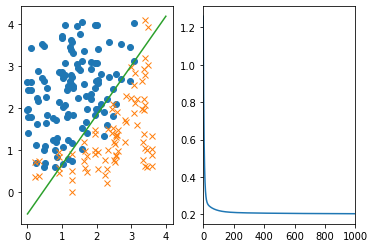

In [18]:
# Q2_graded

data = np.genfromtxt('data.txt', delimiter=',')
data = data.astype('float')

# Normalize & Standardize
maximum = np.max(data[:, :2], axis=0)
minimum = np.min(data[:, :2], axis=0)
normalized = (data[:, :2] - minimum) / (maximum - minimum)
standardized = normalized / np.std(normalized, axis=0)

fig, (ax, err_ax) = plt.subplots(1, 2) 

o_points = standardized[data[:, 2] == 1]
x_points = standardized[data[:, 2] == 0]

ax.plot(o_points[:, 0], o_points[:, 1], 'o')
ax.plot(x_points[:, 0], x_points[:, 1], 'x')

input_data = np.transpose(standardized)

# Change 0s to -1
zero_data = data[data[:, 2] == 0]
zero_data[:, 2] = -1
data[data[:, 2] == 0] = zero_data
result  = data[:, 2]

p = Perceptron()

n_iter = 10000
p.fit(input_data, result, learning_rate=0.01, num_iter=n_iter)

x =  np.arange(5)
ax.plot(x, ((p.bias + p.weights[0] * x)/(-p.weights[1])))

# Errors
err_ax.plot(np.arange(n_iter), p.errors)
err_ax.set_xlim(0, 1000)
fig.show()


# Q4. MLP

In [19]:
# Q4_graded

import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from keras.datasets import mnist
from keras.optimizers import Adam
from keras.layers import Dense
from keras.callbacks import History
from sklearn.utils import shuffle

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_5 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                330       
Total params: 29,642
Trainable params: 29,642
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
108/108 - 1s - loss: 0.8749 - accuracy: 0.7346 - val_loss: 0.2713 - val_accuracy: 0.9250
Epoch 2/20
108/108 - 1s - loss: 0.2929 - accuracy: 0.9157 - val_loss: 0.1992 - val_accuracy: 0.9440
Epoch 3/20
108/108 - 1s - loss: 0.2328 - accurac

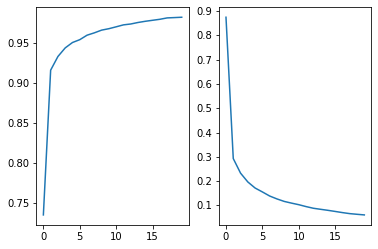

In [20]:
# Q4_graded


# Scale image data
def scale_image(arr):
  return (arr.astype("float32") / 255)

# Load the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Digits should a number from zero to nine
n_classes = 10

# Scaling, Normalizing and Standarizing
# Scale
x_train, x_test = scale_image(x_train), scale_image(x_test)
x_train = x_train.reshape(60000, 784)

# Reshape 
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

# The model
model = keras.Sequential(
    [
        layers.Dense(units=32, input_shape=(784, ), activation='relu'),
        layers.Dense(units=64, activation='relu'),
        layers.Dense(units=32, activation='relu'),
        layers.Dense(n_classes, activation="softmax"),
    ]
)

model.summary()

# Training
history = History()
epochs=20
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=500, epochs=epochs, validation_split=0.1, verbose=2, callbacks=[history])

fig, (ax_acc, err_ax) = plt.subplots(1, 2)

err_ax.plot(np.arange(epochs), history.history.get('loss'))
ax_acc.plot(np.arange(epochs), history.history.get('accuracy'))

fig.show()

In [21]:
# Q4_graded

score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.11364128440618515
Test accuracy: 0.9674999713897705


# Q5. Back-Propagation

In [22]:
# Q5_graded

import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import np_utils


In [23]:
# Q5_graded

# Scale image data
def scale_image(arr):
    return arr.astype("float32") / 255


def relu(z):
    a = np.maximum(0, z)
    return a, z


def relu_diff(da, z):
    dz = np.array(da, copy=True)
    dz[z <= 0] = 0
    return dz


def softmax(z):
    z -= np.max(z, axis=0, keepdims=True)
    ez = np.exp(z)
    a = ez / np.sum(ez, axis=0, keepdims=True)
    return a, z


def softmax_diff(da, z):
    s, cache = softmax(z)
    dz = da * s * (1 - s)
    return dz


# This train function is only for this Gdm.. question.
def train(x, y, learning_rate=0.01, epoch=10):
    # Fields
    # losses & accuracy One element for each epoch
    losses = []
    accuracies = []

    # Generate random weights
    # 1
    # First layer has 130 neurons with 784 inputs.
    weights_layer1 = np.random.rand(130 * 784) * 0.01
    weights_layer1 = weights_layer1.reshape(130, 784)
    bias_layer1 = np.random.rand(130) * 0.01
    bias_layer1 = bias_layer1.reshape(130, 1)

    # 2
    # Second layer has 10, too with 130 inputs.
    # Activations2 = weights_layer2 dot Activations1 + bias_layer2
    weights_layer2 = np.random.rand(10 * 130) * 0.01
    weights_layer2 = weights_layer2.reshape(10, 130)
    bias_layer2 = np.random.rand(10) * 0.01
    bias_layer2 = bias_layer2.reshape(10, 1)

    # Main loop
    for iteration_i in range(epoch):
        epoch_loss = []
        epoch_accuracy = []

        # Forward propagation
        # Output is (10 * 1) array showing the activation to be number  0 <= i < 9
        activations1, z1 = relu(np.dot(weights_layer1, x) + bias_layer1)
        output, z2 = softmax(np.dot(weights_layer2, activations1) + bias_layer2)

        # Calculate the error
        diff = output - y
        loss = np.sum(np.square(diff))
        cost = loss / 60000
        epoch_loss.append(cost)
        losses.append(cost)
        acc = 100 - np.mean(np.abs(diff)) * 100
        epoch_accuracy.append(acc)
        accuracies.append(acc)

        # Back propagation
        da2 = diff

        dz2 = softmax_diff(da2, z2)
        m = activations1.shape[1]
        dw2 = (1 / m) * np.dot(dz2, activations1.T)
        db2 = np.sum(dz2, axis=1, keepdims=True) / m
        da1 = np.dot(weights_layer2.T, dz2)

        dz1 = relu_diff(da1, z1)
        m = x.shape[1]
        dw1 = (1 / m) * np.dot(dz1, x.T)
        db1 = np.sum(dz1, axis=1, keepdims=True) / m
        da0 = np.dot(weights_layer1.T, dz1)

        # Update the weights
        weights_layer1 -= learning_rate * dw1
        bias_layer1 -= learning_rate * db1

        weights_layer2 -= learning_rate * dw2
        bias_layer2 -= learning_rate * db2

        if iteration_i % 50 == 1:
          print("epochs:", iteration_i + 1, "======== cost:", cost, "======== accuracy:", epoch_accuracy)

    # Return
    return {
        "loss": losses,
        "accuracy": accuracies,
        "layers": {
            1: {
                "weights": weights_layer1,
                "biases": bias_layer1
            },
            2: {
                "weights": weights_layer2,
                "biases": bias_layer2
            }
        }
    }



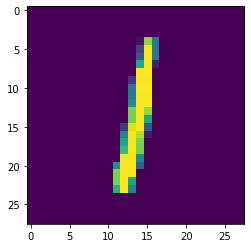

epochs: 2 ======== cost: 0.8987001357290718 ======== accuracy: [82.01522081326638]
epochs: 52 ======== cost: 0.8725579512836346 ======== accuracy: [82.38115074483125]
epochs: 102 ======== cost: 0.6151331619876345 ======== accuracy: [86.12169813108218]
epochs: 152 ======== cost: 0.458319848113044 ======== accuracy: [89.8469911249336]
epochs: 202 ======== cost: 0.30303324940243453 ======== accuracy: [93.36548139513052]
epochs: 252 ======== cost: 0.24445121107991047 ======== accuracy: [94.6697811007027]
epochs: 302 ======== cost: 0.20072695927411272 ======== accuracy: [95.4601915640133]
epochs: 352 ======== cost: 0.17642120423958746 ======== accuracy: [95.93752779966819]
epochs: 402 ======== cost: 0.16299870464754948 ======== accuracy: [96.21438824670307]
epochs: 452 ======== cost: 0.15546783121369048 ======== accuracy: [96.38294929392436]
epochs: 502 ======== cost: 0.14881247184909552 ======== accuracy: [96.51803899651361]
epochs: 552 ======== cost: 0.14434706158039784 ======== accuracy:

In [24]:
# Q5_graded

(x_train, y_train), (x_test, y_test) = mnist.load_data()

n_classes = 10

# Data preprocessing
x_train_flatten = x_train.reshape(x_train.shape[0], -1).T
y_train_flatten = y_train.reshape(x_train.shape[0], -1)
x_test_flatten = x_test.reshape(x_test.shape[0], -1).T
y_test_flatten = y_test.reshape(x_test.shape[0], -1)

# Normalize data
X_train = scale_image(x_train_flatten)
X_test = scale_image(x_test_flatten)

Y_train = np_utils.to_categorical(y_train_flatten, n_classes).T
Y_test = np_utils.to_categorical(y_test_flatten, n_classes).T

# visualizing the data
plt.imshow(x_train[1132])
plt.show()

r = train(X_train, Y_train, learning_rate=0.8, epoch=1200)


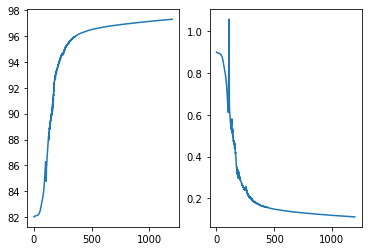

In [25]:
fig, (ax_acc, err_ax) = plt.subplots(1, 2)

print
err_ax.plot(np.arange(len(r["loss"])), np.array(r["loss"]))
ax_acc.plot(np.arange(len(r["accuracy"])), np.array(r["accuracy"]))

fig.show()

In [26]:
# Q5_graded

def fp(x, y):
  activations1, z1 = relu(np.dot(y["layers"][1]["weights"], x) + y["layers"][1]["biases"])
  output, z2 = softmax(np.dot(y["layers"][2]["weights"], activations1) + y["layers"][2]["biases"])
  return output

y_predict = fp(X_test, r)

test_accuracy = 100 - np.mean(np.abs(y_predict, Y_test)) * 100
cost = np.sum(np.square(y_predict, Y_test)) / 1000
print('Accuracy:', test_accuracy)
print('loss', cost)

Accuracy: 89.99999985098839
loss 8.4944453125


# <font color='red'>Submission</font>

1. Sign up in [Gradescope](https://www.gradescope.com) with proper name and student ID and use the following code to join the class: <font color='red'>**D5372R**</font>
2. Fill in your full name (seperated by single spaces) and student ID in the beginning of this notebook.
3. After you're done with this notebook, you should do the following:
  - Clear all outputs of the notebook.
  ![clear all outputs](https://i.ibb.co/y6FrttB/Screen-Shot-2021-03-21-at-01-51-42.png)
  - Run all of the cells (if you skipped a question just leave the cell unchanged), and make sure all of your outputs are correct.
  ![run all](https://i.ibb.co/cgRcBZ0/Screen-Shot-2021-03-21-at-01-54-58.png)
  - Save your notebook.
  
  - If you're using Colab, download your notebook.
  ![download ipynb](https://i.ibb.co/2KxYM6K/Screen-Shot-2021-03-21-at-02-03-50.png)
  
  - Put the notebook file you just downloaded and `convert.py` in the same folder run the following command:
  ```bash
  python convert.py
  ```
  This will export your code for each question into a `.py` file.
    - **Note**: if you want to add more cells, add this to the **first** line of the cell:
  ```python
  # Q5_graded
  ```
  according to the question number.
  - There are 2 assignments in Gradescope:

    ![assignments](https://i.ibb.co/10GMhGM/Screen-Shot-2021-03-21-at-02-16-25.png)
  
    You should upload your **codes** and your **notebook** in `HW1` section and your final report for all of the questions as a **single pdf** file in `HW1 - Report`. Autograder will automatically check for:
    - `CI992_HW1.ipynb`
    - `Q1.py`
    - `Q2.py`
    - `Q4.py`
    - `Q5.py`
    - Your name and ID in the beginning of `.ipynb` file.

    It is important that you <font color='red'>**don't**</font> change the names of these files before submission.

4. If you pass the autograder, you're good to go.